## Checking data distribution

To check what kind of distribution the noise monitor data appears to be in plotted data from noise monitors taken using a histogram to check for distribution type. Also plotted probability density curve for some samples, along with a model of a probability density curve from normally distributed data with the same mean and std to compare.

Dataframe (DF) noise monitor data is LAeq (Equivalent Continuous Sound Pressure Level) which has been averaged in to hourly averages. 

In [1]:
# import libraries

# visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# using numpy arrays for calculations
import numpy as np

# packages to look at data distribution
from scipy.stats import norm
from scipy.stats import kurtosis
from scipy.stats import skew
from statistics import mode
from fitter import Fitter, get_common_distributions, get_distributions


In [2]:
df = pd.read_csv('../Data/datasets/2015_2021noise_pollution_Cleaned.csv', sep = '\t', index_col=[0], parse_dates=['datetime'])

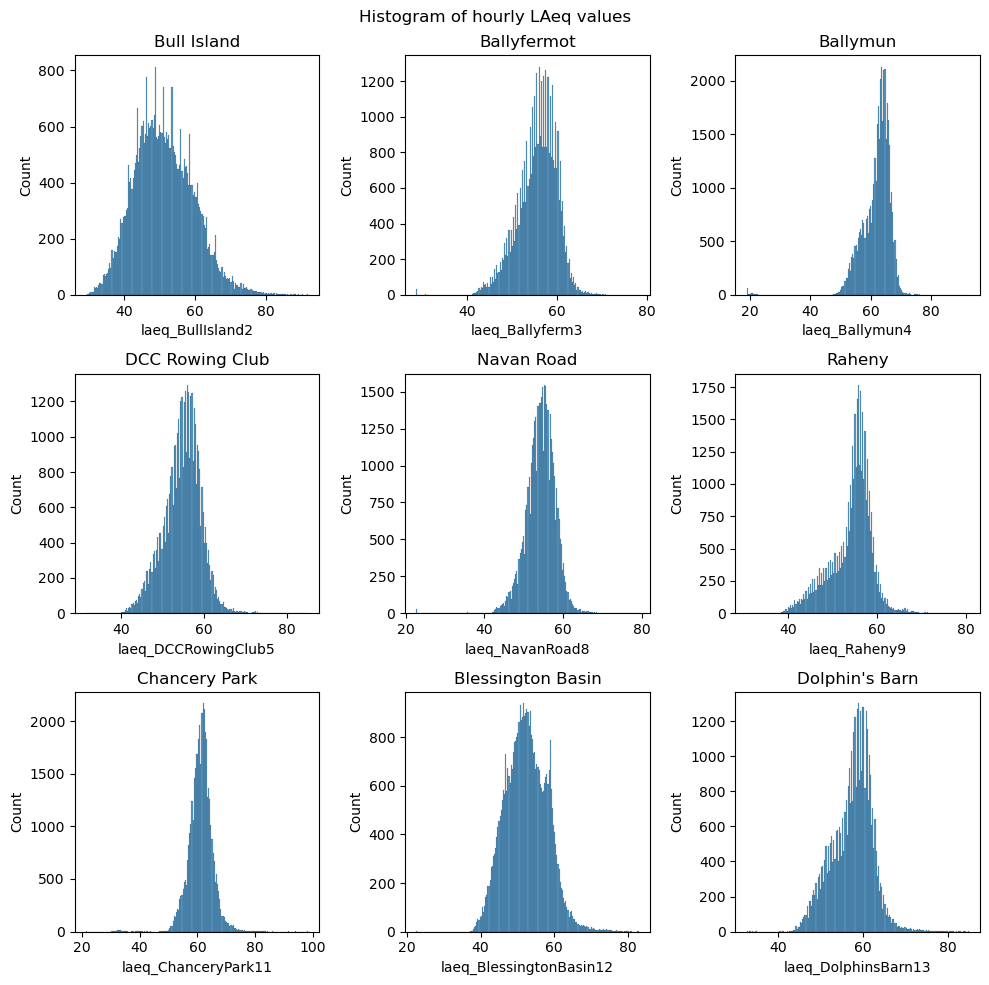

In [3]:
# have 9 columns want to plot histograms for

fig, axs = plt.subplots(nrows = 3, ncols= 3, figsize = (10,10))
sns.histplot(ax=axs[0, 0], data = df['laeq_BullIsland2'], bins = 200)
sns.histplot(ax=axs[0, 1], data = df['laeq_Ballyferm3'], bins = 200)
sns.histplot(ax=axs[0, 2], data = df['laeq_Ballymun4'], bins = 200)
sns.histplot(ax=axs[1, 0], data = df['laeq_DCCRowingClub5'], bins = 200)
sns.histplot(ax=axs[1, 1], data = df['laeq_NavanRoad8'], bins = 200)
sns.histplot(ax=axs[1, 2], data = df['laeq_Raheny9'], bins = 200)
sns.histplot(ax=axs[2, 0], data = df['laeq_ChanceryPark11'], bins = 200)
sns.histplot(ax=axs[2, 1], data = df['laeq_BlessingtonBasin12'], bins = 200)
sns.histplot(ax=axs[2, 2], data = df['laeq_DolphinsBarn13'], bins = 200)

axs[0, 0].set_title('Bull Island')
axs[0, 1].set_title('Ballyfermot')
axs[0, 2].set_title('Ballymun')
axs[1, 0].set_title('DCC Rowing Club')
axs[1, 1].set_title('Navan Road')
axs[1, 2].set_title('Raheny')
axs[2, 0].set_title('Chancery Park')
axs[2, 1].set_title('Blessington Basin')
axs[2, 2].set_title("Dolphin's Barn")
fig.suptitle('Histogram of hourly LAeq values')

fig.tight_layout() # space out the figures

In [4]:
# compute the empirical cumulative distribution (ECDF) of data

# define function to get ECDF - cumulative probability for each as the number of observations less than or equal to a given observation divided by the total number of observations

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y data points from 0 to  1 (end value of arange not inclusive so add 1)
    y = np.arange(1, n+ 1) / n

    return x, y

In [5]:
def normal(data):
    """generates a sample of normally distributed data using the input data's mean and std"""
    normal = np.random.normal(np.mean(data), np.std(data), size = 10000)
    return normal

In [6]:
# put column data in to numpy arrays for analysis

bull_island = np.array(df['laeq_BullIsland2'])
ballyfermot = np.array(df['laeq_Ballyferm3'])
ballymun = np.array(df['laeq_Ballymun4'])
dccrowingclub = np.array(df['laeq_DCCRowingClub5'])
navan_road = np.array(df['laeq_NavanRoad8'])
raheny = np.array(df['laeq_Raheny9'])
chancerypark = np.array(df['laeq_ChanceryPark11'])
blessingtonbasin = np.array(df['laeq_BlessingtonBasin12'])
dolphinsbarn = np.array(df['laeq_DolphinsBarn13'])



In [7]:
# generate data for ecdf and also for model normal distributions (np.random.normal) with the same mean and std to overlay the data

bull_x, bull_y = ecdf(bull_island)
normal_bull_island = normal(bull_island)
bull_model_x, bull_model_y = ecdf(normal_bull_island)

ballyferm_x, ballyferm_y = ecdf(ballyfermot)
normal_ballyferm = normal(ballyfermot)
ballyferm_model_x, ballyferm_model_y = ecdf(normal_ballyferm)

ballymun_x, ballymun_y = ecdf(ballymun)
normal_ballymun = normal(ballymun)
ballymun_model_x, ballymun_model_y = ecdf(normal_ballymun)

dccrowingclub_x, dccrowingclub_y = ecdf(dccrowingclub)
normal_dccrowingclub = normal(dccrowingclub)
dccrowingclub_model_x, dccrowingclub_model_y = ecdf(normal_dccrowingclub)

navan_road_x, navan_road_y = ecdf(navan_road)
normal_navan_road = normal(navan_road)
navan_road_model_x, navan_road_model_y = ecdf(normal_navan_road)

raheny_x, raheny_y = ecdf(raheny)
normal_raheny = normal(raheny)
raheny_model_x, raheny_model_y = ecdf(normal_raheny)

chancerypark_x, chancerypark_y = ecdf(chancerypark)
normal_chancerypark = normal(chancerypark)
chancerypark_model_x, chancerypark_model_y = ecdf(normal_chancerypark)

blessingtonbasin_x, blessingtonbasin_y = ecdf(blessingtonbasin)
normal_blessingtonbasin = normal(blessingtonbasin)
blessingtonbasin_model_x, blessingtonbasin_model_y = ecdf(normal_blessingtonbasin)

dolphinsbarn_x, dolphinsbarn_y = ecdf(dolphinsbarn)
normal_dolphinsbarn = normal(dolphinsbarn)
dolphinsbarn_model_x, dolphinsbarn_model_y = ecdf(normal_dolphinsbarn)



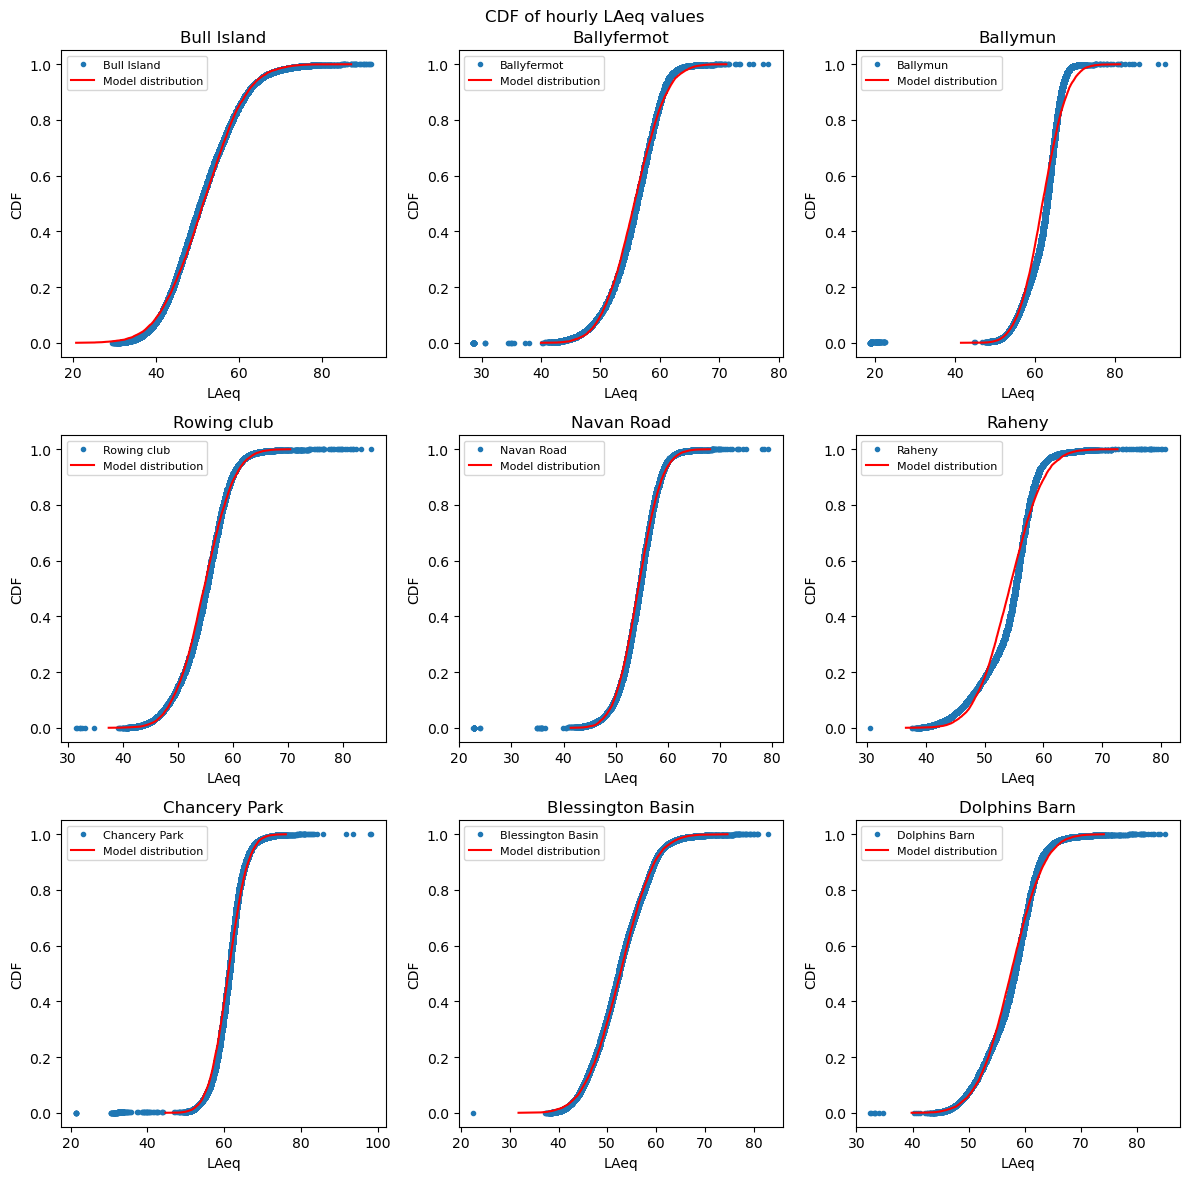

In [8]:
# plot ECDFs and modelled normal distributions for the 9 monitors. Data is in blue dots, modelled normal distribution is a red line.
# plotting empirical data + theoretical data in same figure

fig, axs = plt.subplots(nrows = 3, ncols= 3, figsize = (12,12))

axs[0, 0].plot(bull_x, bull_y, marker = '.', linestyle = 'none', label = 'Bull Island')
axs[0, 0].plot(bull_model_x, bull_model_y, label = 'Model distribution', color = 'red')
axs[0, 0].legend(loc = 'upper left', prop={'size':8})
axs[0, 0].set_title('Bull Island')
axs[0,0].set_xlabel('LAeq')
axs[0,0].set_ylabel('CDF')

axs[0, 1].plot(ballyferm_x, ballyferm_y, marker = '.', linestyle = 'none', label = 'Ballyfermot')
axs[0, 1].plot(ballyferm_model_x, ballyferm_model_y, label = 'Model distribution', color = 'red')
axs[0, 1].legend(loc = 'upper left', prop={'size':8})
axs[0, 1].set_title('Ballyfermot')
axs[0,1].set_xlabel('LAeq')
axs[0,1].set_ylabel('CDF')

axs[0, 2].plot(ballymun_x, ballymun_y, marker = '.', linestyle = 'none', label = 'Ballymun')
axs[0, 2].plot(ballymun_model_x, ballymun_model_y, label = 'Model distribution', color = 'red')
axs[0, 2].legend(loc = 'upper left', prop={'size':8})
axs[0, 2].set_title('Ballymun')
axs[0,2].set_xlabel('LAeq')
axs[0,2].set_ylabel('CDF')

axs[1, 0].plot(dccrowingclub_x, dccrowingclub_y, marker = '.', linestyle = 'none', label = 'Rowing club')
axs[1, 0].plot(dccrowingclub_model_x, dccrowingclub_model_y, label = 'Model distribution', color = 'red')
axs[1, 0].legend(loc = 'upper left', prop={'size':8})
axs[1, 0].set_title('Rowing club')
axs[1,0].set_xlabel('LAeq')
axs[1,0].set_ylabel('CDF')

axs[1, 1].plot(navan_road_x, navan_road_y, marker = '.', linestyle = 'none', label = 'Navan Road')
axs[1, 1].plot(navan_road_model_x, navan_road_model_y, label = 'Model distribution', color = 'red')
axs[1, 1].legend(loc = 'upper left', prop={'size':8})
axs[1, 1].set_title('Navan Road')
axs[1,1].set_xlabel('LAeq')
axs[1,1].set_ylabel('CDF')

axs[1, 2].plot(raheny_x, raheny_y, marker = '.', linestyle = 'none', label = 'Raheny')
axs[1, 2].plot(raheny_model_x, raheny_model_y, label = 'Model distribution', color = 'red')
axs[1, 2].legend(loc = 'upper left', prop={'size':8})
axs[1, 2].set_title('Raheny')
axs[1,2].set_xlabel('LAeq')
axs[1,2].set_ylabel('CDF')

axs[2, 0].plot(chancerypark_x, chancerypark_y, marker = '.', linestyle = 'none', label = 'Chancery Park')
axs[2, 0].plot(chancerypark_model_x, chancerypark_model_y, label = 'Model distribution', color = 'red')
axs[2, 0].legend(loc = 'upper left', prop={'size':8})
axs[2, 0].set_title('Chancery Park')
axs[2,0].set_xlabel('LAeq')
axs[2,0].set_ylabel('CDF')

axs[2, 1].plot(blessingtonbasin_x, blessingtonbasin_y, marker = '.', linestyle = 'none', label = 'Blessington Basin')
axs[2, 1].plot(blessingtonbasin_model_x, blessingtonbasin_model_y, label = 'Model distribution', color = 'red')
axs[2, 1].legend(loc = 'upper left', prop={'size':8})
axs[2, 1].set_title('Blessington Basin')
axs[2,1].set_xlabel('LAeq')
axs[2,1].set_ylabel('CDF')

axs[2, 2].plot(dolphinsbarn_x, dolphinsbarn_y, marker = '.', linestyle = 'none', label = 'Dolphins Barn')
axs[2, 2].plot(dolphinsbarn_model_x, dolphinsbarn_model_y, label = 'Model distribution', color = 'red')
axs[2, 2].legend(loc = 'upper left', prop={'size':8})
axs[2, 2].set_title('Dolphins Barn')
axs[2,2].set_xlabel('LAeq')
axs[2,2].set_ylabel('CDF')

fig.suptitle('CDF of hourly LAeq values')
fig.tight_layout()


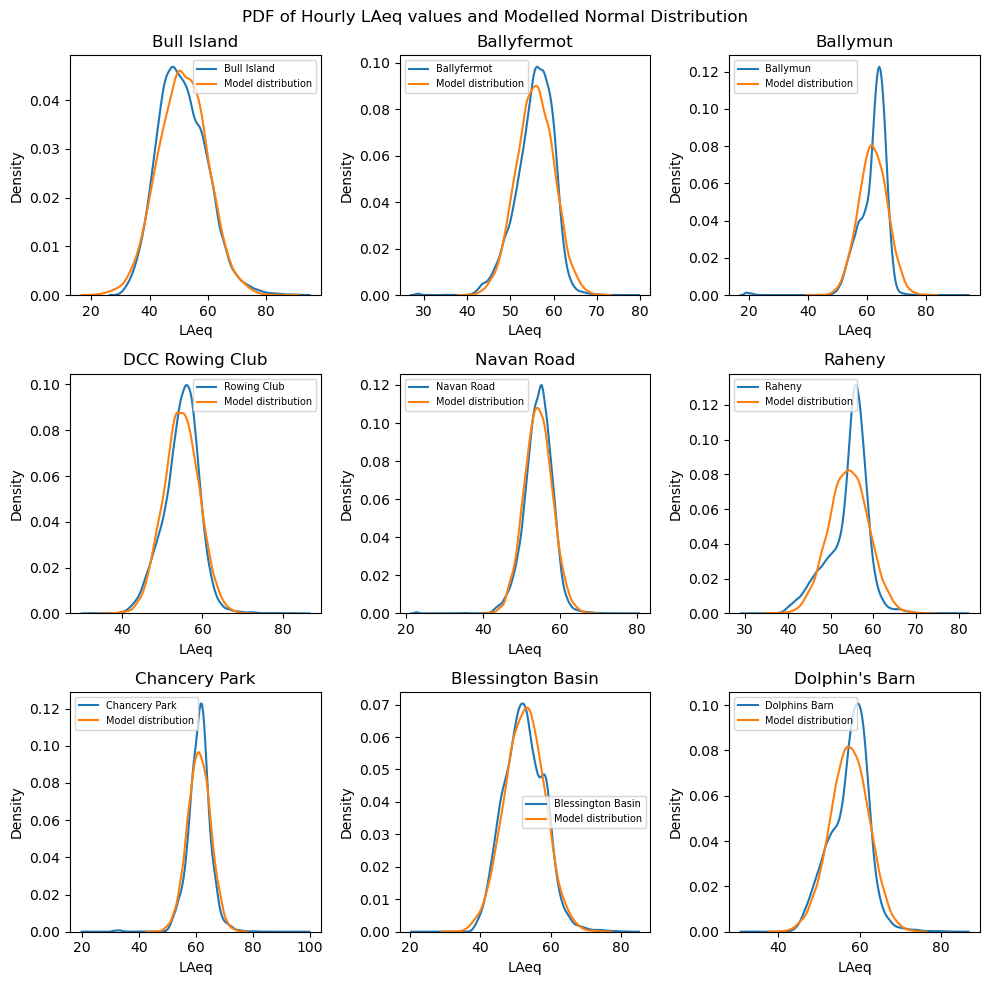

In [9]:
# Can plot the probability density functions (PDFs) of the data and a normally distributed model to have a look at the distributions.

fig, axs = plt.subplots(nrows = 3, ncols= 3, figsize = (10,10))

sns.kdeplot(ax=axs[0, 0], data = bull_island, label = 'Bull Island')
sns.kdeplot(ax=axs[0, 0], data = normal_bull_island, label = 'Model distribution')
axs[0,0].set_xlabel('LAeq')
axs[0, 0].legend(loc = 'best', prop={'size':7})

sns.kdeplot(ax=axs[0, 1], data = ballyfermot, label = 'Ballyfermot')
sns.kdeplot(ax=axs[0, 1], data = normal_ballyferm, label = 'Model distribution')
axs[0,1].set_xlabel('LAeq')
axs[0, 1].legend(loc = 'best', prop={'size':7})

sns.kdeplot(ax=axs[0, 2], data = ballymun, label = 'Ballymun')
sns.kdeplot(ax=axs[0, 2], data = normal_ballymun, label = 'Model distribution')
axs[0,2].set_xlabel('LAeq')
axs[0, 2].legend(loc = 'best', prop={'size':7})

sns.kdeplot(ax=axs[1, 0], data = dccrowingclub, label = 'Rowing Club')
sns.kdeplot(ax=axs[1, 0], data = normal_dccrowingclub, label = 'Model distribution')
axs[1,0].set_xlabel('LAeq')
axs[1, 0].legend(loc = 'best', prop={'size':7})

sns.kdeplot(ax=axs[1, 1], data = navan_road, label = 'Navan Road')
sns.kdeplot(ax=axs[1, 1], data = normal_navan_road, label = 'Model distribution')
axs[1,1].set_xlabel('LAeq')
axs[1, 1].legend(loc = 'best', prop={'size':7})

sns.kdeplot(ax=axs[1, 2], data = raheny, label = 'Raheny')
sns.kdeplot(ax=axs[1, 2], data = normal_raheny, label = 'Model distribution')
axs[1,2].set_xlabel('LAeq')
axs[1, 2].legend(loc = 'best', prop={'size':7})

sns.kdeplot(ax=axs[2, 0], data = chancerypark, label = 'Chancery Park')
sns.kdeplot(ax=axs[2, 0], data = normal_chancerypark, label = 'Model distribution')
axs[2, 0].set_xlabel('LAeq')
axs[2, 0].legend(loc = 'best', prop={'size':7})

sns.kdeplot(ax=axs[2, 1], data = blessingtonbasin, label = 'Blessington Basin')
sns.kdeplot(ax=axs[2, 1], data = normal_blessingtonbasin, label = 'Model distribution')
axs[2,1].set_xlabel('LAeq')
axs[2, 1].legend(loc = 'best', prop={'size':7})

sns.kdeplot(ax=axs[2, 2], data = dolphinsbarn, label = 'Dolphins Barn')
sns.kdeplot(ax=axs[2, 2], data = normal_dolphinsbarn, label = 'Model distribution')
axs[2,2].set_xlabel('LAeq')
axs[2, 2].legend(loc = 'best', prop={'size':7})


axs[0, 0].set_title('Bull Island')
axs[0, 1].set_title('Ballyfermot')
axs[0, 2].set_title('Ballymun')
axs[1, 0].set_title('DCC Rowing Club')
axs[1, 1].set_title('Navan Road')
axs[1, 2].set_title('Raheny')
axs[2, 0].set_title('Chancery Park')
axs[2, 1].set_title('Blessington Basin')
axs[2, 2].set_title("Dolphin's Barn")
fig.suptitle('PDF of Hourly LAeq values and Modelled Normal Distribution')

fig.tight_layout() # space out the figures

In [10]:
# kurtosis is a measure of how data is centered around the mean relative to normal distribution, indicates more extreme values.
df.kurtosis()

/var/folders/3w/qk3jn0b95mb0c72rjz15z8340000gn/T/ipykernel_3919/2654515307.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


laeq_BullIsland2            0.300180
laeq_Ballyferm3             1.459487
laeq_Ballymun4             19.139780
laeq_DCCRowingClub5         1.064971
laeq_NavanRoad8             4.446126
laeq_Raheny9                1.062277
laeq_ChanceryPark11         8.255830
laeq_BlessingtonBasin12     0.265010
laeq_DolphinsBarn13         0.750309
day_of_month               -1.206509
day_of_week                -1.245205
hour_of_day                -1.203493
dtype: float64

In [11]:
# have a look at how skewed the data are
df.skew()

/var/folders/3w/qk3jn0b95mb0c72rjz15z8340000gn/T/ipykernel_3919/2247523939.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


laeq_BullIsland2           0.430459
laeq_Ballyferm3           -0.629934
laeq_Ballymun4            -2.678206
laeq_DCCRowingClub5       -0.115366
laeq_NavanRoad8           -0.594632
laeq_Raheny9              -0.585704
laeq_ChanceryPark11       -0.807082
laeq_BlessingtonBasin12    0.275902
laeq_DolphinsBarn13       -0.136881
day_of_month              -0.020743
day_of_week               -0.022672
hour_of_day               -0.000990
dtype: float64

Can use the Python module 'Fitter' to see what kind of distribution could be used to describe a sample like the Ballymun noise monitor data.

In [12]:
# get a sample of Ballymun data, Fitter can take a while to model the data so take a subset

Ballymun_sample = np.random.choice(ballymun, size = 2000)

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
mielke,0.002599,1589.535645,-27076.787109,inf,0.025328,0.151045
burr,0.002599,1581.443220,-27076.373551,inf,0.022818,0.244991
genlogistic,0.002691,1439.135469,-27014.337984,inf,0.032409,0.029297
genhyperbolic,0.002966,1507.364454,-26804.900583,inf,0.029135,0.065738
norminvgauss,0.003094,1467.362633,-26728.237228,inf,0.034997,0.014550


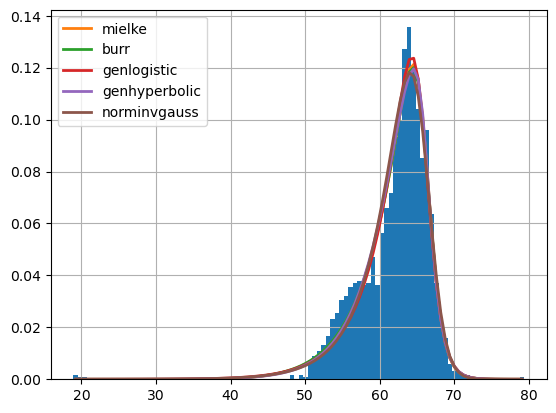

In [13]:
f = Fitter(Ballymun_sample) # Create a Fitter instance
f.fit() # apply the .fit( ) method to data
f.summary() # Generate the fitted distribution summary

Looks like data for Ballymun is left-skewed and has high kurtosis. Chancery park also leptokurtic. Keep this in mind for analysis and methods. Sample size is large. 

## Writing custom function to return modal average of maximum LAeq hourly timepoint

In order to determine what the modal average might be for the hour of the day in which the peak LAeq occurs for each timepoint defined 'peak_LAeq' function.

In [14]:
# specify list of columns to check the time which max LAeq is most frequently found
columns = ['laeq_BullIsland2', 'laeq_Ballyferm3', 'laeq_Ballymun4','laeq_DCCRowingClub5', 'laeq_NavanRoad8', 'laeq_Raheny9', 'laeq_ChanceryPark11', 'laeq_BlessingtonBasin12', 'laeq_DolphinsBarn13']


In [15]:
def peak_LAeq(dataframe, column_name, func=mode):
    """ Returns the average(mode) hour in a day where the daily LAeq maximum was recorded"""
    
    max_location = dataframe[column_name].resample('1d').apply(lambda s: s.idxmax() if not s.empty else None) # get location of the peak and the timepoint
    
    myarray = np.empty(len(max_location)) # initialize empty nparray
    for i in range(len(max_location)):
        myarray[i] = max_location[i].hour # add peak value times to array
    hour_values_cleaned = [x for x in myarray if not np.isnan(x)] #get array without any Nans for mode function to work
    return func(myarray) # return the average

In [16]:
# get the modal average for the hourly timepoint that contains the peak daily LAeq value from the monitors

for col in columns:
    print(f'Monitor {col} has maximum LAeq modal average of {peak_LAeq(df, col)} (24h hour clock)')

Monitor laeq_BullIsland2 has maximum LAeq modal average of 18.0 (24h hour clock)
Monitor laeq_Ballyferm3 has maximum LAeq modal average of 8.0 (24h hour clock)
Monitor laeq_Ballymun4 has maximum LAeq modal average of 18.0 (24h hour clock)
Monitor laeq_DCCRowingClub5 has maximum LAeq modal average of 12.0 (24h hour clock)
Monitor laeq_NavanRoad8 has maximum LAeq modal average of 7.0 (24h hour clock)
Monitor laeq_Raheny9 has maximum LAeq modal average of 8.0 (24h hour clock)
Monitor laeq_ChanceryPark11 has maximum LAeq modal average of 11.0 (24h hour clock)
Monitor laeq_BlessingtonBasin12 has maximum LAeq modal average of 11.0 (24h hour clock)
Monitor laeq_DolphinsBarn13 has maximum LAeq modal average of 10.0 (24h hour clock)
